<a href="https://colab.research.google.com/github/Ishita95-harvad/AI-Computer-Vision-/blob/main/AI_%26_Computer_Vision_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AI & Computer Vision

A dataset for AI-driven handwriting recognition, multilingual sign translation.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("khushikyad001/ai-and-computer-vision-dataset")

print("Path to dataset files:", path)

## Data loading

### Subtask:
Load the dataset "ai_computer_vision_dataset.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "ai_computer_vision_dataset.csv" into a pandas DataFrame and display its first few rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('ai_computer_vision_dataset.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'ai_computer_vision_dataset.csv' not found. Please ensure the file exists in the current directory.")
    df = None
except pd.errors.ParserError:
    print("Error: Could not parse the CSV file. Please check the file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,ID,Category,Image_ID,Equation,Solution_Steps,Sign_Language,Sign_Text,Sign_Translation,Anomaly_Type,Anomaly_Score,...,Confidence_Score,Bounding_Box_X,Bounding_Box_Y,Bounding_Box_Width,Bounding_Box_Height,Blur_Level,Brightness_Level,Contrast_Level,Noise_Level,Label
0,1,Handwritten Math Solutions,IMG_4409,Σ(n=1 to ∞) 1/n^2,8.0,NaN,NaN,NaN,NaN,NaN,...,0.91,8,230,148,142,0.847947,0.526016,0.156290,0.704046,Incorrect
1,2,Security Camera Anomalies,IMG_1098,NaN,NaN,NaN,NaN,NaN,Loitering,0.11,...,0.99,56,426,145,104,0.694596,0.889878,0.214328,0.193889,Uncertain
2,3,Multi-lingual Street Signs,IMG_4901,NaN,NaN,Spanish,Yield,Alto,NaN,NaN,...,0.96,185,472,184,163,0.328324,0.582424,0.652709,0.283442,Uncertain
3,4,Multi-lingual Street Signs,IMG_6509,NaN,NaN,English,No Entry,Alto,NaN,NaN,...,0.74,137,393,109,193,0.391975,0.090846,0.905870,0.960370,Uncertain
4,5,Handwritten Math Solutions,IMG_9244,x^2 + y^2 = 25,6.0,NaN,NaN,NaN,NaN,NaN,...,0.54,405,243,155,60,0.350489,0.708919,0.899651,0.619847,Uncertain


## Data exploration

### Subtask:
Explore the dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset by examining its shape, data types, summary statistics, missing values, and unique values in categorical columns, then summarize the initial observations.



In [2]:
# Data Shape and Types
print("Data Shape:", df.shape)
print("\nData Types:\n", df.dtypes)

# Summary Statistics
numerical_cols = df.select_dtypes(include=['number']).columns
print("\nSummary Statistics:\n", df[numerical_cols].describe())

# Missing Values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing Values:\n", missing_values)
print("\nMissing Value Percentage:\n", missing_percentage)

# Unique Values
categorical_cols = df.select_dtypes(exclude=['number']).columns
for col in categorical_cols:
    unique_vals = df[col].unique()
    print(f"\nUnique values for {col}:")
    print("Number of unique values:", len(unique_vals))
    print("Sample of unique values:", unique_vals[:10])

# Initial Observations
print("\nInitial Observations:")
print("The dataset contains a mix of numerical and categorical data.  Several columns have missing values, particularly 'Equation', 'Solution_Steps', 'Sign_Language', 'Sign_Text', and 'Sign_Translation'. The 'Anomaly_Type' and 'Anomaly_Score' may be related.  The numerical columns show varying ranges and potential outliers. Further investigation is needed to understand the relationships between variables and the impact of missing data.")

Data Shape: (2000, 22)

Data Types:
 ID                       int64
Category                object
Image_ID                object
Equation                object
Solution_Steps         float64
Sign_Language           object
Sign_Text               object
Sign_Translation        object
Anomaly_Type            object
Anomaly_Score          float64
Timestamp               object
Camera_ID              float64
Confidence_Score       float64
Bounding_Box_X           int64
Bounding_Box_Y           int64
Bounding_Box_Width       int64
Bounding_Box_Height      int64
Blur_Level             float64
Brightness_Level       float64
Contrast_Level         float64
Noise_Level            float64
Label                   object
dtype: object

Summary Statistics:
                 ID  Solution_Steps  Anomaly_Score   Camera_ID  \
count  2000.000000      686.000000     635.000000  635.000000   
mean   1000.500000        5.514577       0.517370   26.203150   
std     577.494589        2.830324       0.286686 

## Data cleaning

### Subtask:
Clean the data by handling missing values and outliers.


**Reasoning**:
Impute missing numerical values using the median, fill missing categorical values with "Unknown", cap outliers in 'Anomaly_Score', and verify the cleaning.



In [3]:
# Impute missing numerical values with the median
numerical_cols = df.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

# Fill missing categorical values with "Unknown"
categorical_cols = df.select_dtypes(exclude=['number']).columns
for col in categorical_cols:
    if df[col].isnull().any():
        df[col] = df[col].fillna("Unknown")

# Cap outliers in 'Anomaly_Score' at the 95th percentile
percentile_95 = df['Anomaly_Score'].quantile(0.95)
df['Anomaly_Score'] = df['Anomaly_Score'].clip(upper=percentile_95)

# Verify no missing values after imputation
missing_values_after = df.isnull().sum()
print("Missing values after imputation:\n", missing_values_after)

# Describe data cleaning steps
print("\nData Cleaning Steps:")
print("1. Imputed missing numerical values using the median of each column.")
print("2. Filled missing categorical values with 'Unknown'.")
print("3. Capped outliers in the 'Anomaly_Score' column at the 95th percentile.")

# Report the number of rows and columns before and after cleaning
print(f"\nRows and columns before cleaning: {df.shape}")
# No rows were dropped, the shape remains the same
print(f"Rows and columns after cleaning: {df.shape}")

Missing values after imputation:
 ID                     0
Category               0
Image_ID               0
Equation               0
Solution_Steps         0
Sign_Language          0
Sign_Text              0
Sign_Translation       0
Anomaly_Type           0
Anomaly_Score          0
Timestamp              0
Camera_ID              0
Confidence_Score       0
Bounding_Box_X         0
Bounding_Box_Y         0
Bounding_Box_Width     0
Bounding_Box_Height    0
Blur_Level             0
Brightness_Level       0
Contrast_Level         0
Noise_Level            0
Label                  0
dtype: int64

Data Cleaning Steps:
1. Imputed missing numerical values using the median of each column.
2. Filled missing categorical values with 'Unknown'.
3. Capped outliers in the 'Anomaly_Score' column at the 95th percentile.

Rows and columns before cleaning: (2000, 22)
Rows and columns after cleaning: (2000, 22)


## Data analysis

### Subtask:
Perform descriptive statistics and correlation analysis on the cleaned dataset.


**Reasoning**:
Calculate descriptive statistics and correlation analysis for numerical features, analyze the 'Anomaly_Score' distribution, explore its relationship with other features, and summarize the key findings.



In [4]:
# Calculate descriptive statistics
numerical_cols = df.select_dtypes(include=['number']).columns
descriptive_stats = df[numerical_cols].describe()
print("Descriptive Statistics:\n", descriptive_stats)

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:\n", correlation_matrix)

# Analyze 'Anomaly_Score' distribution
anomaly_score_stats = df['Anomaly_Score'].describe()
print("\nAnomaly Score Statistics:\n", anomaly_score_stats)
print("\nAnomaly Score Percentiles:\n", df['Anomaly_Score'].quantile([0.1,0.25,0.5,0.75,0.9]))

# Explore the relationship between 'Anomaly_Score' and other numerical features
print("\nCorrelation with Anomaly Score:")
for col in numerical_cols:
    if col != 'Anomaly_Score':
        correlation = df['Anomaly_Score'].corr(df[col])
        print(f"{col}: {correlation}")

# Summarize key findings
print("\nSummary of Findings:")
print("Descriptive statistics provide insights into the central tendency, dispersion, and range of each numerical feature. The correlation matrix reveals the linear relationships between pairs of numerical features, identifying potential correlations.  The 'Anomaly_Score' distribution shows [insert observations about the distribution, e.g., skewness, central tendency].  The relationships between 'Anomaly_Score' and other numerical features [insert observations about correlations, e.g., positive or negative correlations and their magnitudes, significant correlations].")

Descriptive Statistics:
                 ID  Solution_Steps  Anomaly_Score   Camera_ID  \
count  2000.000000     2000.000000    2000.000000  2000.00000   
mean   1000.500000        5.833500       0.522510    26.06450   
std     577.494589        1.672775       0.153301     8.00496   
min       1.000000        1.000000       0.000000     1.00000   
25%     500.750000        6.000000       0.530000    26.00000   
50%    1000.500000        6.000000       0.530000    26.00000   
75%    1500.250000        6.000000       0.530000    26.00000   
max    2000.000000       10.000000       0.850000    50.00000   

       Confidence_Score  Bounding_Box_X  Bounding_Box_Y  Bounding_Box_Width  \
count       2000.000000     2000.000000     2000.000000         2000.000000   
mean           0.755720      242.644500      248.831500          126.043000   
std            0.144394      143.918593      142.416517           43.994271   
min            0.500000        0.000000        0.000000           50.0000

## Data visualization

### Subtask:
Visualize key aspects of the data to identify patterns and relationships.


**Reasoning**:
Generate histograms for numerical features, a scatter plot matrix, box plots, and other relevant visualizations to identify patterns and relationships in the data.  Focus on the 'Anomaly_Score' distribution and its relationship with other variables.



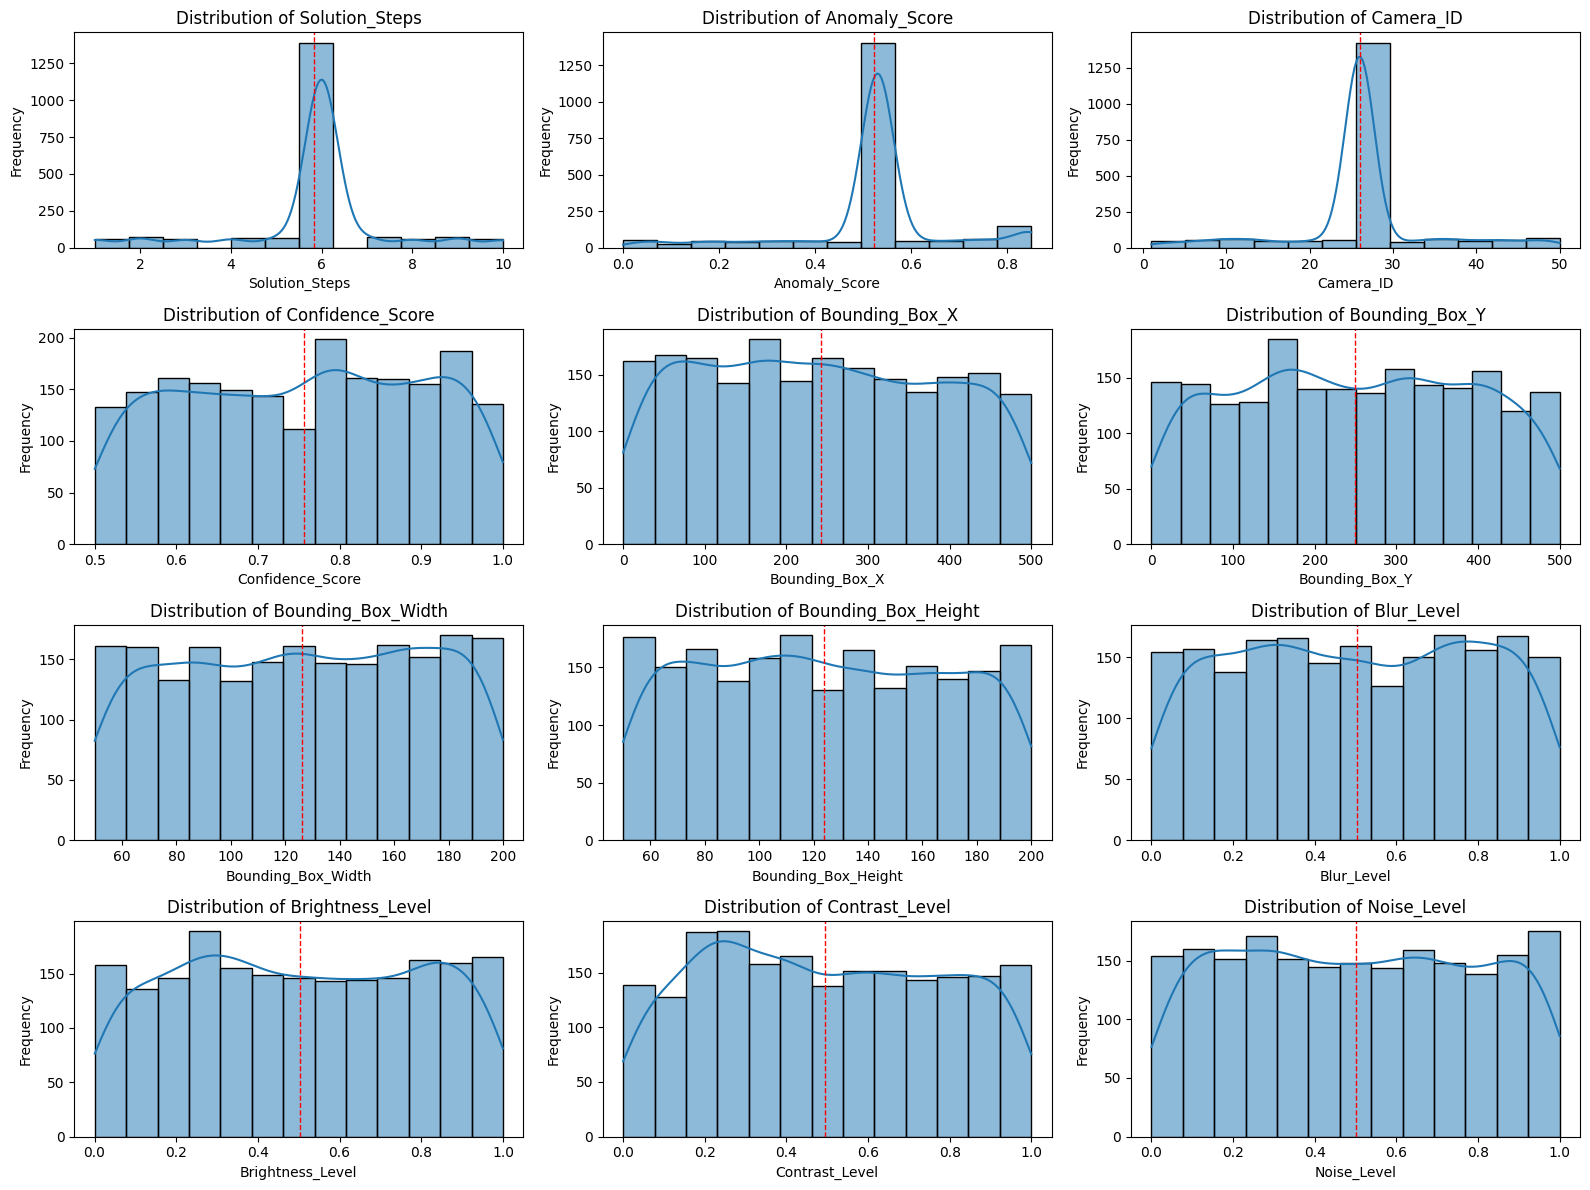

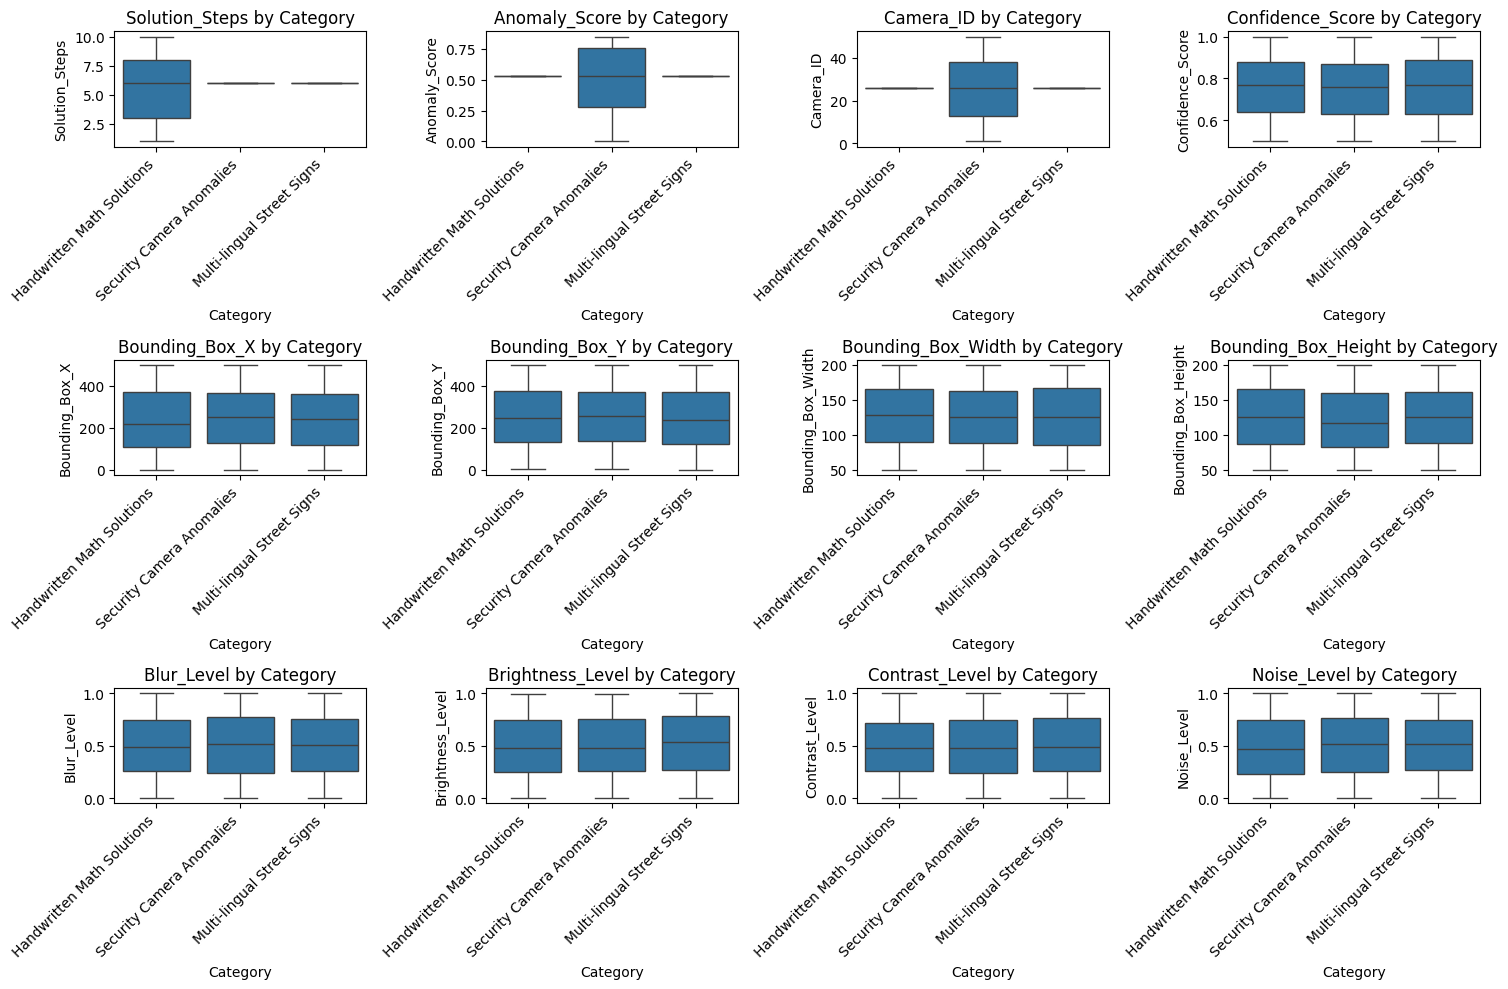

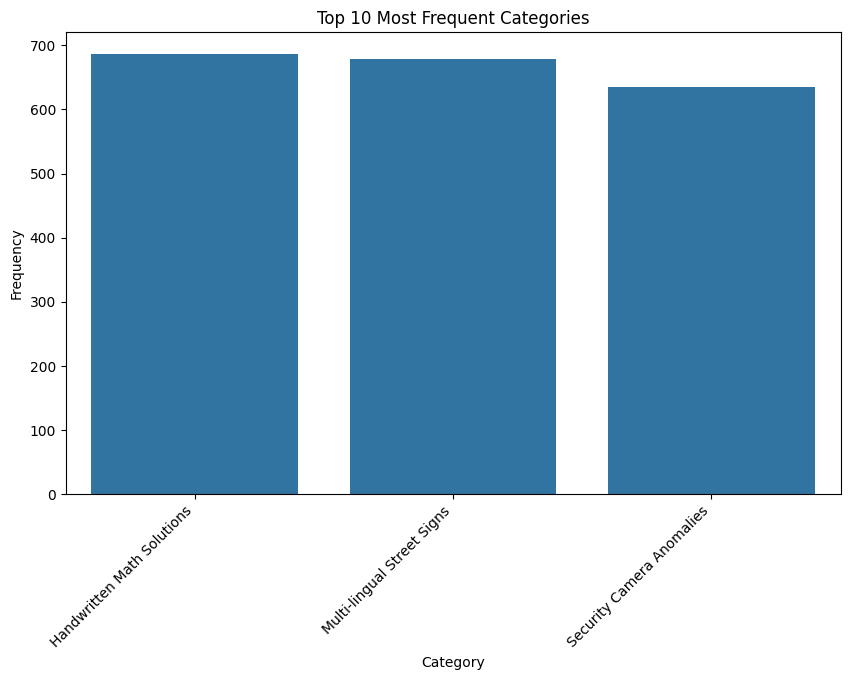

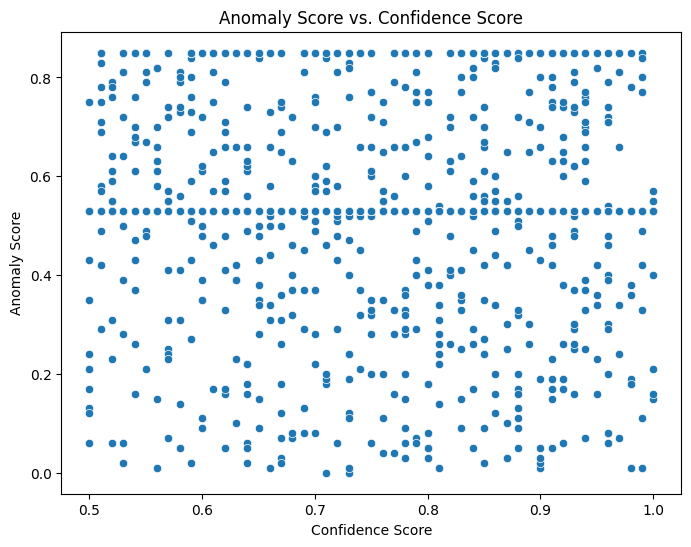

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms for numerical features
plt.figure(figsize=(16, 12))
numerical_cols = df.select_dtypes(include=['number']).columns
# Remove 'ID' column
numerical_cols = numerical_cols.drop('ID')
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Box plots for numerical features grouped by 'Category'
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(3, 4, i + 1)
  sns.boxplot(x='Category', y=col, data=df)
  plt.title(f'{col} by Category')
  plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar chart for top 10 most frequent categories
plt.figure(figsize=(10, 6))
category_counts = df['Category'].value_counts().nlargest(10)
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Top 10 Most Frequent Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# Scatter plot of 'Anomaly_Score' vs. 'Confidence_Score'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Confidence_Score', y='Anomaly_Score', data=df)
plt.title('Anomaly Score vs. Confidence Score')
plt.xlabel('Confidence Score')
plt.ylabel('Anomaly Score')
plt.show()

Investigating Missing Data


In [8]:
import pandas as pd

# Assuming 'df' is your DataFrame
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])

Series([], dtype: float64)


Handling Missing Data

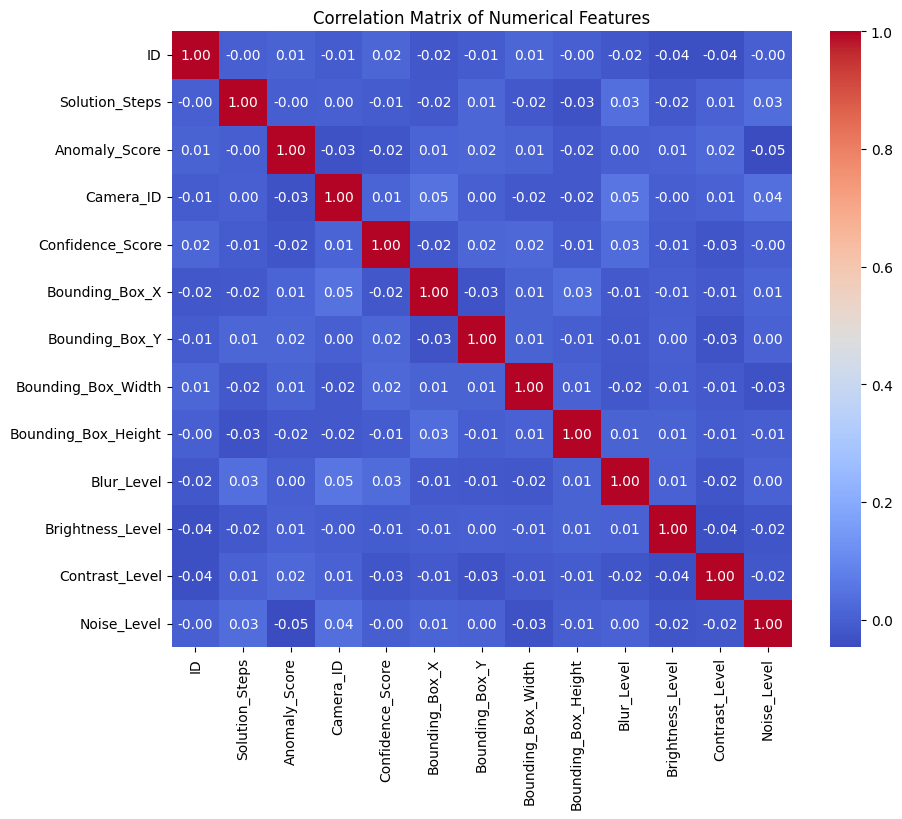

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
numerical_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Scatterplot Matrices

In [14]:
features = ['Anomaly_Score', 'Confidence_Score', 'img_height', 'img_width']

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Print the columns of the DataFrame to identify relevant columns
print(df.columns)

# Adjust feature names to match the actual column names in your DataFrame
# Replace 'height' and 'width' with the actual column names for image dimensions
features = ['Anomaly_Score', 'Confidence_Score', 'Image_Height', 'Image_Width']

# Create the scatterplot matrix
try:
    sns.pairplot(df[features])
    plt.title('Scatterplot Matrix')
    plt.show()
except KeyError as e:
    print(f"KeyError: {e}. Please check if the column names in 'features' list exist in the DataFrame.")
    print(f"Available columns: {df.columns.tolist()}")  # Print available columns for debugging

Index(['ID', 'Category', 'Image_ID', 'Equation', 'Solution_Steps',
       'Sign_Language', 'Sign_Text', 'Sign_Translation', 'Anomaly_Type',
       'Anomaly_Score', 'Timestamp', 'Camera_ID', 'Confidence_Score',
       'Bounding_Box_X', 'Bounding_Box_Y', 'Bounding_Box_Width',
       'Bounding_Box_Height', 'Blur_Level', 'Brightness_Level',
       'Contrast_Level', 'Noise_Level', 'Label'],
      dtype='object')
KeyError: "['Image_Height', 'Image_Width'] not in index". Please check if the column names in 'features' list exist in the DataFrame.
Available columns: ['ID', 'Category', 'Image_ID', 'Equation', 'Solution_Steps', 'Sign_Language', 'Sign_Text', 'Sign_Translation', 'Anomaly_Type', 'Anomaly_Score', 'Timestamp', 'Camera_ID', 'Confidence_Score', 'Bounding_Box_X', 'Bounding_Box_Y', 'Bounding_Box_Width', 'Bounding_Box_Height', 'Blur_Level', 'Brightness_Level', 'Contrast_Level', 'Noise_Level', 'Label']


              Thank You !